In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [11]:
# Loading the uploaded dataset
file_path = '/content/adult_with_headers.csv'
data = pd.read_csv(file_path)

In [12]:
# Display basic data exploration results
data_summary = {
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Summary Statistics": data.describe(include='all')
}

In [13]:
print("############## Data Exploration and Preprocessing:#################")
print(data_summary)


############## Data Exploration and Preprocessing:#################
{'Data Types': age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object, 'Missing Values': age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64, 'Summary Statistics':                  age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN       

In [14]:
# Select numerical columns for scaling from the dataset
numericalFeatures = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [15]:
# Standard Scaling
standard_scaler = StandardScaler()
standardScaled_data = standard_scaler.fit_transform(data[numericalFeatures])
standardScaled_df = pd.DataFrame(standardScaled_data, columns=[f"{col}_standard_scaled" for col in numericalFeatures])


In [16]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmaxScaled_data = minmax_scaler.fit_transform(data[numericalFeatures])
minmaxScaled_df = pd.DataFrame(minmaxScaled_data, columns=[f"{col}_minmax_scaled" for col in numericalFeatures])


In [17]:
# Combine original and scaled data for comparison
scaledData_combined = pd.concat([data[numericalFeatures], standardScaled_df, minmaxScaled_df], axis=1)

scaledData_combined.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age_standard_scaled,fnlwgt_standard_scaled,education_num_standard_scaled,capital_gain_standard_scaled,capital_loss_standard_scaled,hours_per_week_standard_scaled,age_minmax_scaled,fnlwgt_minmax_scaled,education_num_minmax_scaled,capital_gain_minmax_scaled,capital_loss_minmax_scaled,hours_per_week_minmax_scaled
0,39,77516,13,2174,0,40,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,50,83311,13,0,0,13,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,38,215646,9,0,0,40,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,53,234721,7,0,0,40,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,28,338409,13,0,0,40,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


############## Apply Encoding Techniques:################

In [18]:
# Identify categorical features on the dataset
categoricalFeatures = data.select_dtypes(include=['object']).columns

In [19]:
# Determine the number of unique categories in each categorical feature
category_counts = {col: data[col].nunique() for col in categoricalFeatures}


In [20]:
# Separate features based on the number of categories
one_hot_features = [col for col, count in category_counts.items() if count <= 5]
label_encoding_features = [col for col, count in category_counts.items() if count > 5]


In [21]:
# Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') # Changed 'sparse' to 'sparse_output'
one_hot_encoded_data = pd.DataFrame(
    one_hot_encoder.fit_transform(data[one_hot_features]),
    columns=one_hot_encoder.get_feature_names_out(one_hot_features)
)


In [22]:
# Apply Label Encoding
label_encoder = LabelEncoder()
label_encoded_data = data[label_encoding_features].apply(label_encoder.fit_transform)


In [23]:
# Combine encoded data with the rest of the dataset
encoded_data = pd.concat(
    [data.drop(columns=one_hot_features + label_encoding_features),
     one_hot_encoded_data,
     label_encoded_data],
    axis=1
)

In [24]:
print("\n########## Encoded Data #########")
encoded_data.head()



########## Encoded Data #########


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country
0,39,77516,13,2174,0,40,0.0,0.0,0.0,1.0,1.0,0.0,7,9,4,1,1,39
1,50,83311,13,0,0,13,0.0,0.0,0.0,1.0,1.0,0.0,6,9,2,4,0,39
2,38,215646,9,0,0,40,0.0,0.0,0.0,1.0,1.0,0.0,4,11,0,6,1,39
3,53,234721,7,0,0,40,0.0,1.0,0.0,0.0,1.0,0.0,4,1,2,6,0,39
4,28,338409,13,0,0,40,0.0,1.0,0.0,0.0,0.0,0.0,4,9,2,10,5,5


In [25]:
print("\n########## Scaled Data #########")
scaledData_combined.head()


########## Scaled Data #########


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age_standard_scaled,fnlwgt_standard_scaled,education_num_standard_scaled,capital_gain_standard_scaled,capital_loss_standard_scaled,hours_per_week_standard_scaled,age_minmax_scaled,fnlwgt_minmax_scaled,education_num_minmax_scaled,capital_gain_minmax_scaled,capital_loss_minmax_scaled,hours_per_week_minmax_scaled
0,39,77516,13,2174,0,40,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,50,83311,13,0,0,13,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,38,215646,9,0,0,40,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,53,234721,7,0,0,40,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,28,338409,13,0,0,40,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [26]:
# Create new features
# 1. Age group: Categorizing age into bins (e.g., Young, Middle-Aged, Senior)
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 60, 90], labels=['Young', 'Middle-Aged', 'Senior'])


In [27]:
# 2. Capital net gain: Combining capital_gain and capital_loss into a single feature
data['capital_net'] = data['capital_gain'] - data['capital_loss']


In [28]:
# Identify skewed numerical features
skewed_features = data[['capital_gain', 'capital_loss']].skew()

In [29]:
# Apply log transformation to capital_gain (skewed positively)
data['capital_gain_log'] = np.log1p(data['capital_gain'])


In [30]:
# Summary of changes and rationale
new_features_summary = {
    'New Features': ['age_group', 'capital_net'],
    'Rationale': [
        "Age group simplifies the age feature into categories, potentially capturing non-linear relationships.",
        "Capital net gain consolidates gain and loss, reducing redundancy and focusing on overall impact."
    ],
    'Skewed Feature Transformed': 'capital_gain',
    'Transformation': 'Log transformation applied to reduce positive skewness and normalize the distribution.'
}


In [31]:
print("############## New Features and Rationale:#################")
print(new_features_summary)


############## New Features and Rationale:#################
{'New Features': ['age_group', 'capital_net'], 'Rationale': ['Age group simplifies the age feature into categories, potentially capturing non-linear relationships.', 'Capital net gain consolidates gain and loss, reducing redundancy and focusing on overall impact.'], 'Skewed Feature Transformed': 'capital_gain', 'Transformation': 'Log transformation applied to reduce positive skewness and normalize the distribution.'}


In [32]:
from sklearn.ensemble import IsolationForest
from ppscore import score as pps

In [33]:
def display_dataframe(name, dataframe):
    """
    Displays the given DataFrame to the user with a title.

    Args:
        name (str): The title to display above the DataFrame.
        dataframe (pd.DataFrame): The DataFrame to display.
    """
    print(f"\n########## {name} #########")
    print(dataframe)  # Or you could use display(dataframe) for a richer display in Jupyter



In [34]:
# Step 1: Outlier Detection with Isolation Forest
# Selecting numerical columns for outlier detection
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns


In [35]:
# Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['outlier'] = iso_forest.fit_predict(data[numerical_columns])


In [36]:
# Remove outliers (where prediction is -1)
data_no_outliers = data[data['outlier'] != -1].drop(columns=['outlier'])


In [37]:
# Step 2: PPS (Predictive Power Score)
pps_matrix = data_no_outliers.apply(lambda col: pps(data_no_outliers, 'income', col.name), axis=0)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


In [38]:
# Step 3: Correlation Matrix
correlation_matrix = data_no_outliers.corr()


<ipython-input-38-7e0c0a8091cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_no_outliers.corr()


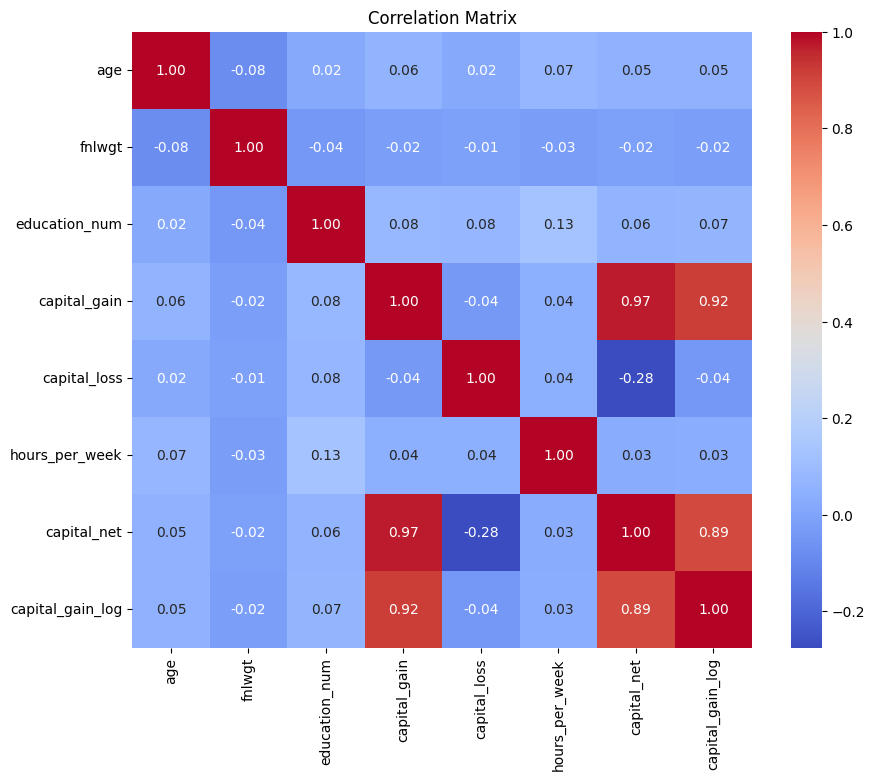

In [39]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [40]:
display_dataframe(name="PPS Matrix", dataframe=pps_matrix)
{
    "Outlier Removal": f"{len(data) - len(data_no_outliers)} rows removed as outliers.",
    "Impact of Outliers": "Outliers can distort the mean and variance, affecting model training and leading to overfitting or incorrect patterns.",
    "PPS vs Correlation": "PPS identifies non-linear relationships while correlation measures linear relationships. PPS can reveal relationships missed by correlation."
}



########## PPS Matrix #########
age                 {'x': 'income', 'y': 'age', 'ppscore': 0.03541...
workclass           {'x': 'income', 'y': 'workclass', 'ppscore': 1...
fnlwgt              {'x': 'income', 'y': 'fnlwgt', 'ppscore': 0, '...
education           {'x': 'income', 'y': 'education', 'ppscore': 0...
education_num       {'x': 'income', 'y': 'education_num', 'ppscore...
marital_status      {'x': 'income', 'y': 'marital_status', 'ppscor...
occupation          {'x': 'income', 'y': 'occupation', 'ppscore': ...
relationship        {'x': 'income', 'y': 'relationship', 'ppscore'...
race                {'x': 'income', 'y': 'race', 'ppscore': 1.7567...
sex                 {'x': 'income', 'y': 'sex', 'ppscore': 0, 'cas...
capital_gain        {'x': 'income', 'y': 'capital_gain', 'ppscore'...
capital_loss        {'x': 'income', 'y': 'capital_loss', 'ppscore'...
hours_per_week      {'x': 'income', 'y': 'hours_per_week', 'ppscor...
native_country      {'x': 'income', 'y': 'native_country'

{'Outlier Removal': '1628 rows removed as outliers.',
 'Impact of Outliers': 'Outliers can distort the mean and variance, affecting model training and leading to overfitting or incorrect patterns.',
 'PPS vs Correlation': 'PPS identifies non-linear relationships while correlation measures linear relationships. PPS can reveal relationships missed by correlation.'}